In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import torch
from torch.autograd import Variable
from PIL import Image
from glob import glob
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
from tqdm.notebook import tqdm

# Primer punto 
Cargamos los datos y los mezclamos. Luego, definimos listas con las direcciones de las imagenes y clasificamos entre train, test, valid

In [6]:
train_files = glob('./mnist/train/*/*.png')
valid_files = glob('./mnist/valid/*/*.png')
test_files = glob('./mnist/test/*/*.png')
np.random.shuffle(train_files)
np.random.shuffle(valid_files)
np.random.shuffle(test_files)
N_train = len(train_files)
X_train = []
Y_train = []

for i, train_file in enumerate(train_files):
    Y_train.append( int(train_file.split('\\')[1]) )
    X_train.append(np.array(Image.open(train_file)))
N_valid = len(valid_files)
X_valid = []
Y_valid = []

for i, valid_file in enumerate(valid_files):
    Y_valid.append( int(valid_file.split('\\')[1]) )
    X_valid.append( np.array(Image.open(valid_file)) )
N_test = len(test_files)
X_test = []
Y_test = []

for i, test_file in enumerate(test_files):
    Y_test.append( int(test_file.split('\\')[1]) )
    X_test.append( np.array(Image.open(test_file)) )

In [14]:
X_train = Variable(torch.from_numpy(np.array(X_train))).float()
Y_train = Variable(torch.from_numpy(np.array(Y_train))).long()

X_valid = Variable(torch.from_numpy(np.array(X_valid))).float()
Y_valid = Variable(torch.from_numpy(np.array(Y_valid))).long()

X_test = Variable(torch.from_numpy(np.array(X_test))).float()
Y_test = Variable(torch.from_numpy(np.array(Y_test))).long()


In [8]:
def CM(Y_true, Y_pred, classes):
    """
    Función que permite graficar la matriz de confusión para unas predicciones específicas
    INPUT: Valores reales, predicciones, y número de clases que se clasifican
    OUTPUT: Grafica la matriz de confusión
    """
    fig = plt.figure(figsize=(10, 10))
    cm = confusion_matrix(Y_true, Y_pred)
    lclasses = np.arange(0,classes)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    cmap=plt.cm.Blues
    ax = fig.add_subplot(1,1,1)
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax, pad=0.01, shrink=0.86)
    ax.set(xticks=np.arange(cm.shape[1]), yticks=np.arange(cm.shape[0]),xticklabels=lclasses, yticklabels=lclasses)
    ax.set_xlabel("Predicted",size=20)
    ax.set_ylabel("True",size=20)
    ax.set_ylim(classes-0.5, -0.5)

    plt.setp(ax.get_xticklabels(), size=12)
    plt.setp(ax.get_yticklabels(), size=12)

    fmt = '.2f'
    thresh = cm.max()/2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),ha="center", va="center",size=15 , color="white" if cm[i, j] > thresh else "black")

    plt.show()

In [11]:
def train_valid(model, n_epoch, optimizer, criterion):
    loss_train = []
    f1_train = []
    acc_train = []

    loss_valid = []
    f1_valid = []
    acc_valid = []

    for epoch in range(n_epoch):
        model.train()

        Xtr = X_train.view(X_train.size(0), -1)
        Y_pred = model(Xtr)

        loss = criterion(Y_pred,Y_train)
        loss_train.append(loss.item())

        Y_pred = torch.argmax(Y_pred, 1)
        f1_train.append( f1_score(Y_train,Y_pred, average='macro') )

        acc = sum(Y_train == Y_pred)/len(Y_pred)
        acc_train.append(acc)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        model.eval()
        Xvl = X_valid.view(X_valid.size(0), -1)
        Y_pred = model(Xvl)  
        loss = criterion(Y_pred,Y_valid)
        loss_valid.append(loss.item())

        Y_pred = torch.argmax(Y_pred, 1)
        f1_valid.append( f1_score(Y_valid, Y_pred, average='macro') )

        acc = sum(Y_valid == Y_pred)/len(Y_pred)
        acc_valid.append(acc)
    print( 'Valid Evaluation loss: {}. f1:{} acc: {} '.format(loss_valid[-1], f1_valid[-1], acc_valid[-1]) )
    return f1_valid[-1], Y_pred, Y_valid

## Usamos la definición de la función de validación de un modelo. Sin embargo, solo vamos a graficar la matriz de confusión para los mejores parámetros

### Primer modelo: 
Tres capas internas, funciones de activación sigmoidal

ne: 50, hd:50, wd:0.001, lr: 0.001, bs:256 
Valid Evaluation loss: 1.8004816770553589. f1:0.815104138169521 acc: 0 
###################

ne: 50, hd:80, wd:0.001, lr: 0.001, bs:256 
Valid Evaluation loss: 1.5336921215057373. f1:0.805547256482398 acc: 0 
###################

ne: 50, hd:100, wd:0.001, lr: 0.001, bs:256 
Valid Evaluation loss: 1.2405956983566284. f1:0.7437084954379989 acc: 0 
###################

ne: 50, hd:50, wd:0.01, lr: 0.001, bs:256 
Valid Evaluation loss: 1.8335530757904053. f1:0.7845543339528321 acc: 0 
###################

ne: 50, hd:80, wd:0.01, lr: 0.001, bs:256 
Valid Evaluation loss: 1.5636792182922363. f1:0.7741952643005344 acc: 0 
###################

ne: 50, hd:100, wd:0.01, lr: 0.001, bs:256 
Valid Evaluation loss: 1.3266265392303467. f1:0.811747454493727 acc: 0 
###################

ne: 50, hd:50, wd:0.1, lr: 0.001, bs:256 
Valid Evaluation loss: 2.1867687702178955. f1:0.7951136451246653 acc: 0 
###################

ne: 50, hd:80, wd:0.1, lr: 0.001, bs:256

Valid Evaluation loss: 2.180612802505493. f1:0.7405668507302183 acc: 0 
###################

ne: 50, hd:80, wd:0.1, lr: 0.001, bs:1024 
Valid Evaluation loss: 2.12117075920105. f1:0.7678074571604618 acc: 0 
###################

ne: 50, hd:100, wd:0.1, lr: 0.001, bs:1024 
Valid Evaluation loss: 2.0567898750305176. f1:0.8104235942591286 acc: 0 
###################

ne: 50, hd:50, wd:0.001, lr: 0.01, bs:1024 
Valid Evaluation loss: 0.4859083294868469. f1:0.8504009888989984 acc: 0 
###################

ne: 50, hd:80, wd:0.001, lr: 0.01, bs:1024 
Valid Evaluation loss: 0.3595905601978302. f1:0.9002157542784118 acc: 0 
###################

ne: 50, hd:100, wd:0.001, lr: 0.01, bs:1024 
Valid Evaluation loss: 0.3969505727291107. f1:0.8882307496747757 acc: 0 
###################

ne: 50, hd:50, wd:0.01, lr: 0.01, bs:1024 
Valid Evaluation loss: 0.6338623762130737. f1:0.8564598768681817 acc: 0 
###################

ne: 50, hd:80, wd:0.01, lr: 0.01, bs:1024 
Valid Evaluation loss: 0.51187306642532

Valid Evaluation loss: 0.5431163907051086. f1:0.873694720115678 acc: 0 
###################

ne: 100, hd:80, wd:0.01, lr: 0.01, bs:512 
Valid Evaluation loss: 0.4535558819770813. f1:0.8914868980744746 acc: 0 
###################

ne: 100, hd:100, wd:0.01, lr: 0.01, bs:512 
Valid Evaluation loss: 0.4456664025783539. f1:0.894115930202043 acc: 0 
###################

ne: 100, hd:50, wd:0.1, lr: 0.01, bs:512 
Valid Evaluation loss: 2.0242488384246826. f1:0.09018430469287939 acc: 0 
###################

ne: 100, hd:80, wd:0.1, lr: 0.01, bs:512 
Valid Evaluation loss: 1.9679663181304932. f1:0.11859122059840659 acc: 0 
###################

ne: 100, hd:100, wd:0.1, lr: 0.01, bs:512 
Valid Evaluation loss: 1.9616256952285767. f1:0.13223240040684883 acc: 0 
###################

ne: 100, hd:50, wd:0.001, lr: 0.1, bs:512 
Valid Evaluation loss: 0.8733243346214294. f1:0.7105903457342356 acc: 0 
###################

ne: 100, hd:80, wd:0.001, lr: 0.1, bs:512 
Valid Evaluation loss: 0.7846875786781311

Valid Evaluation loss: 0.9276551604270935. f1:0.6977871725843667 acc: 0 
###################

ne: 150, hd:80, wd:0.001, lr: 0.1, bs:256 
Valid Evaluation loss: 0.9374775886535645. f1:0.6422743132246475 acc: 0 
###################

ne: 150, hd:100, wd:0.001, lr: 0.1, bs:256 
Valid Evaluation loss: 0.7689235806465149. f1:0.7459756639663585 acc: 0 
###################

ne: 150, hd:50, wd:0.01, lr: 0.1, bs:256 
Valid Evaluation loss: 1.0422821044921875. f1:0.6765100315567487 acc: 0 
###################

ne: 150, hd:80, wd:0.01, lr: 0.1, bs:256 
Valid Evaluation loss: 1.3435055017471313. f1:0.3855188923211601 acc: 0 
###################

ne: 150, hd:100, wd:0.01, lr: 0.1, bs:256 
Valid Evaluation loss: 1.5799936056137085. f1:0.5433293546071442 acc: 0 
###################

ne: 150, hd:50, wd:0.1, lr: 0.1, bs:256 
Valid Evaluation loss: 2.302609443664551. f1:0.01818181818181818 acc: 0 
###################

ne: 150, hd:80, wd:0.1, lr: 0.1, bs:256 
Valid Evaluation loss: 2.3830368518829346. f1:

Valid Evaluation loss: 2.3025929927825928. f1:0.01818181818181818 acc: 0 
###################

ne: 150, hd:80, wd:0.1, lr: 0.1, bs:1024 
Valid Evaluation loss: 2.304263114929199. f1:0.01818181818181818 acc: 0 
###################

ne: 150, hd:100, wd:0.1, lr: 0.1, bs:1024 
Valid Evaluation loss: 2.3045382499694824. f1:0.01818181818181818 acc: 0 
###################


Evaluación del mejor modelo: f1=0.9272418886239917


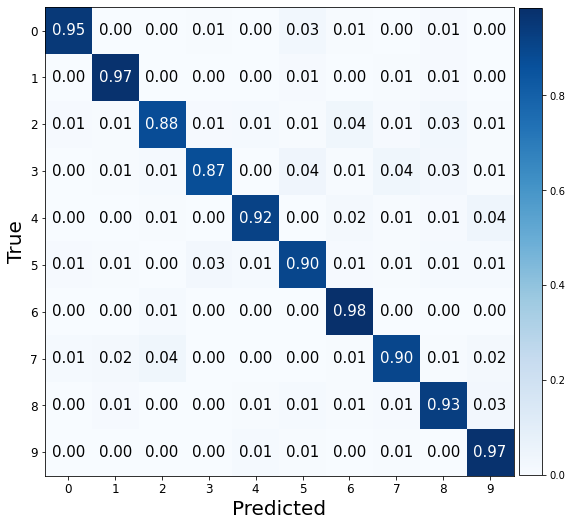

In [15]:
bs_list = [256,512,1024]
lr_list = [0.001,0.01,0.1]
wd_list = [0.001,0.01,0.1]
hd_list = [50,80,100]
ne_list = [50,100,150]
params= []
scores = []
preds = []
vals = []
pbar = tqdm(total=len(bs_list)*len(lr_list)*len(wd_list)*len(hd_list)*len(ne_list))

for ne in ne_list:
    for bs in bs_list:
        train_ds = TensorDataset(X_train, Y_train)
        train_dl = DataLoader(train_ds, batch_size=bs, shuffle=True)

        for lr in lr_list:
            for wd in wd_list:
                for hd in hd_list:
                    input_dim = 28*28
                    out_dim = 10
                    hidden = hd

                    model = torch.nn.Sequential(
                    torch.nn.Linear(input_dim, hidden),
                    torch.nn.Sigmoid(),
                    torch.nn.Linear(hidden, hidden),
                    torch.nn.Sigmoid(),
                    torch.nn.Linear(hidden,out_dim)
                    )

                    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=wd)
                    criterion = torch.nn.CrossEntropyLoss()
                    params.append([ne,hd,wd,lr,bs])
                    
                    print('ne: {}, hd:{}, wd:{}, lr: {}, bs:{} '.format(ne,hd,wd,lr,bs))
                    f1, Y_pred, Y_valid = train_valid(model,ne,optimizer,criterion)
                    scores.append(f1)
                    preds.append(Y_pred)
                    vals.append(Y_valid)
                    print('###################\n')

                    pbar.update()
pbar.close()
best_score = max(scores)
index = scores.index(best_score)
best_params = params[index]
Y_pred = preds[index]
Y_val = vals[index]
print('Evaluación del mejor modelo: f1={}'.format(best_score))
CM(Y_valid,Y_pred,10)

### Segundo modelo 
Usamos cuatro capas conectadas linealmente, variando las funciones de activación entre ellas. La primera tendrá una sigmoidal, la segunda una log(softmax()) y la ultima una RELU

ne: 50, hd:50, wd:0.001, lr: 0.001, bs:256 


C:\Anaconda\lib\site-packages\torch\nn\modules\container.py:100: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Valid Evaluation loss: 2.117462396621704. f1:0.4725126785015939 acc: 0 
###################

ne: 50, hd:80, wd:0.001, lr: 0.001, bs:256 
Valid Evaluation loss: 1.459181308746338. f1:0.7382108872355093 acc: 0 
###################

ne: 50, hd:100, wd:0.001, lr: 0.001, bs:256 
Valid Evaluation loss: 0.9911474585533142. f1:0.7869053365991329 acc: 0 
###################

ne: 50, hd:50, wd:0.01, lr: 0.001, bs:256 
Valid Evaluation loss: 1.4341483116149902. f1:0.6350785769570677 acc: 0 
###################

ne: 50, hd:80, wd:0.01, lr: 0.001, bs:256 
Valid Evaluation loss: 0.9112474322319031. f1:0.7952305112367963 acc: 0 
###################

ne: 50, hd:100, wd:0.01, lr: 0.001, bs:256 
Valid Evaluation loss: 0.7188255190849304. f1:0.8256501370581907 acc: 0 
###################

ne: 50, hd:50, wd:0.1, lr: 0.001, bs:256 
Valid Evaluation loss: 1.9000308513641357. f1:0.6015012590443563 acc: 0 
###################

ne: 50, hd:80, wd:0.1, lr: 0.001, bs:256 
Valid Evaluation loss: 1.832282543182373.

Valid Evaluation loss: 1.7197265625. f1:0.5570913898021623 acc: 0 
###################

ne: 50, hd:80, wd:0.1, lr: 0.001, bs:1024 
Valid Evaluation loss: 1.7493069171905518. f1:0.6681176511234329 acc: 0 
###################

ne: 50, hd:100, wd:0.1, lr: 0.001, bs:1024 
Valid Evaluation loss: 1.5042623281478882. f1:0.7421091249044023 acc: 0 
###################

ne: 50, hd:50, wd:0.001, lr: 0.01, bs:1024 
Valid Evaluation loss: 0.7501464486122131. f1:0.7494610057041569 acc: 0 
###################

ne: 50, hd:80, wd:0.001, lr: 0.01, bs:1024 
Valid Evaluation loss: 0.9006795287132263. f1:0.687629422116444 acc: 0 
###################

ne: 50, hd:100, wd:0.001, lr: 0.01, bs:1024 
Valid Evaluation loss: 1.1365654468536377. f1:0.6023863499030185 acc: 0 
###################

ne: 50, hd:50, wd:0.01, lr: 0.01, bs:1024 
Valid Evaluation loss: 0.7339120507240295. f1:0.7296266779703944 acc: 0 
###################

ne: 50, hd:80, wd:0.01, lr: 0.01, bs:1024 
Valid Evaluation loss: 0.8239753246307373. 

Valid Evaluation loss: 0.717953622341156. f1:0.7758303346400819 acc: 0 
###################

ne: 100, hd:80, wd:0.01, lr: 0.01, bs:512 
Valid Evaluation loss: 0.5134691596031189. f1:0.8525745468129303 acc: 0 
###################

ne: 100, hd:100, wd:0.01, lr: 0.01, bs:512 
Valid Evaluation loss: 0.5800908803939819. f1:0.8214615724929224 acc: 0 
###################

ne: 100, hd:50, wd:0.1, lr: 0.01, bs:512 
Valid Evaluation loss: 1.6300005912780762. f1:0.3051170075744978 acc: 0 
###################

ne: 100, hd:80, wd:0.1, lr: 0.01, bs:512 
Valid Evaluation loss: 1.6847167015075684. f1:0.21551018632663568 acc: 0 
###################

ne: 100, hd:100, wd:0.1, lr: 0.01, bs:512 
Valid Evaluation loss: 2.3025577068328857. f1:0.01818181818181818 acc: 0 
###################

ne: 100, hd:50, wd:0.001, lr: 0.1, bs:512 
Valid Evaluation loss: 1.7802987098693848. f1:0.2280654461670842 acc: 0 
###################

ne: 100, hd:80, wd:0.001, lr: 0.1, bs:512 
Valid Evaluation loss: 1.7341902256011963

Valid Evaluation loss: 1.5502263307571411. f1:0.3716912166326175 acc: 0 
###################

ne: 150, hd:80, wd:0.001, lr: 0.1, bs:256 
Valid Evaluation loss: 2.2591166496276855. f1:0.16421540600980866 acc: 0 
###################

ne: 150, hd:100, wd:0.001, lr: 0.1, bs:256 
Valid Evaluation loss: 1.76958167552948. f1:0.2900220874215712 acc: 0 
###################

ne: 150, hd:50, wd:0.01, lr: 0.1, bs:256 
Valid Evaluation loss: 2.3173704147338867. f1:0.0183163737280296 acc: 0 
###################

ne: 150, hd:80, wd:0.01, lr: 0.1, bs:256 
Valid Evaluation loss: 2.827378511428833. f1:0.01818181818181818 acc: 0 
###################

ne: 150, hd:100, wd:0.01, lr: 0.1, bs:256 
Valid Evaluation loss: 20.159250259399414. f1:0.01818181818181818 acc: 0 
###################

ne: 150, hd:50, wd:0.1, lr: 0.1, bs:256 
Valid Evaluation loss: 2.3026115894317627. f1:0.01818181818181818 acc: 0 
###################

ne: 150, hd:80, wd:0.1, lr: 0.1, bs:256 
Valid Evaluation loss: 2.3062379360198975. f1

Valid Evaluation loss: 2.302590847015381. f1:0.01818181818181818 acc: 0 
###################

ne: 150, hd:80, wd:0.1, lr: 0.1, bs:1024 
Valid Evaluation loss: 3.0869529247283936. f1:0.01818181818181818 acc: 0 
###################

ne: 150, hd:100, wd:0.1, lr: 0.1, bs:1024 
Valid Evaluation loss: 2.5027222633361816. f1:0.01818181818181818 acc: 0 
###################


Evaluación del mejor modelo: f1=0.8911753327852694


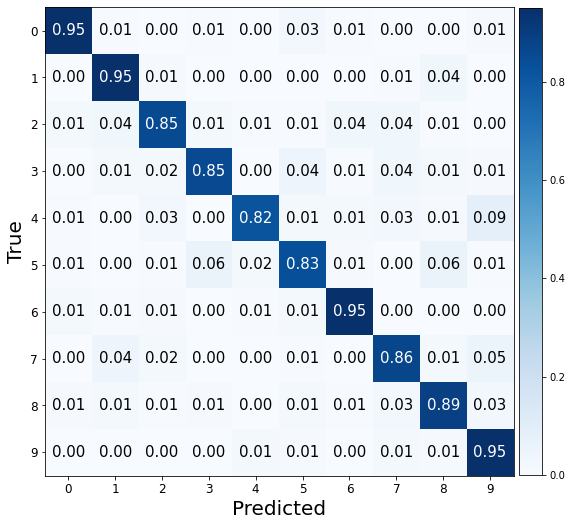

In [16]:
bs_list = [256,512,1024]
lr_list = [0.001,0.01,0.1]
wd_list = [0.001,0.01,0.1]
hd_list = [50,80,100]
ne_list = [50,100,150]
params= []
scores = []
preds = []
vals = []
pbar = tqdm(total=len(bs_list)*len(lr_list)*len(wd_list)*len(hd_list)*len(ne_list))

for ne in ne_list:
    for bs in bs_list:
        train_ds = TensorDataset(X_train, Y_train)
        train_dl = DataLoader(train_ds, batch_size=bs, shuffle=True)

        for lr in lr_list:
            for wd in wd_list:
                for hd in hd_list:
                    input_dim = 28*28
                    out_dim = 10
                    hidden = hd

                    model = torch.nn.Sequential(
                    torch.nn.Linear(input_dim, hidden),
                    torch.nn.Sigmoid(),
                    torch.nn.Linear(hidden, hidden),
                    torch.nn.LogSoftmax(),
                    torch.nn.Linear(hidden, hidden),
                    torch.nn.LeakyReLU(),
                    torch.nn.Linear(hidden,out_dim)
                    )

                    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=wd)
                    criterion = torch.nn.CrossEntropyLoss()
                    params.append([ne,hd,wd,lr,bs])
                    
                    print('ne: {}, hd:{}, wd:{}, lr: {}, bs:{} '.format(ne,hd,wd,lr,bs))
                    f1, Y_pred, Y_valid = train_valid(model,ne,optimizer,criterion)
                    scores.append(f1)
                    preds.append(Y_pred)
                    vals.append(Y_valid)
                    print('###################\n')

                    pbar.update()
pbar.close()
best_score = max(scores)
index = scores.index(best_score)
best_params = params[index]
Y_pred = preds[index]
Y_val = vals[index]
print('Evaluación del mejor modelo: f1={}'.format(best_score))
CM(Y_valid,Y_pred,10)

## Analisis 
Para el primer modelo, los parámetros que resultaron en el mejor valor del f1-score fueron ne: 150, hd:100, wd:0.001, lr: 0.01, bs:512, es decir, con un learning rate bajo-normal y sin tanto weight decay el modelo funciona bien con 100 neuronas escondidas, un batch-size de 512 y 150 epocas. El valor del f1-score para el primer modelo fue de 0.92. Para el segundo modelo, que además tuvo un peor f1-score que el primero, tenemos que el número de neuronas ocultas fue menor, esto se explica desde el hecho que aumentamos la cantidad de capas, por lo cual una menor cantidad de neuronas por capa permitiría extraer la información necesaria. Asimismo, como en el primer modelo, el learning rate y el weight decay fueron bajos, por lo cual no se tiene un problema de overfittinh. El número de epocas fue óptimo en 150 para ambos modelos